<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>

In [96]:
#Import libraries
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

print('imported')

imported


<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!

In [97]:
#set-up random seed using numpy's random.seed() function starting at 0
np.random.seed(0)

Next, <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs. 
<br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [98]:
# define mak_blobs class
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

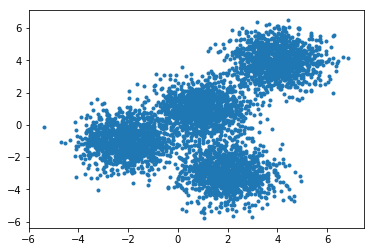

In [99]:
# display the plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker='.')

<b>The scatter plot have 4 segments</b>

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used,I will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [100]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [101]:
# fit the KMeans model with features matrix - X
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [102]:
# fit KMeans .labels_ attribute and save it as k_means_labels
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [103]:
# build cendroid KMeans .cluster_centers_ , and save it as k_means_cluster_centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

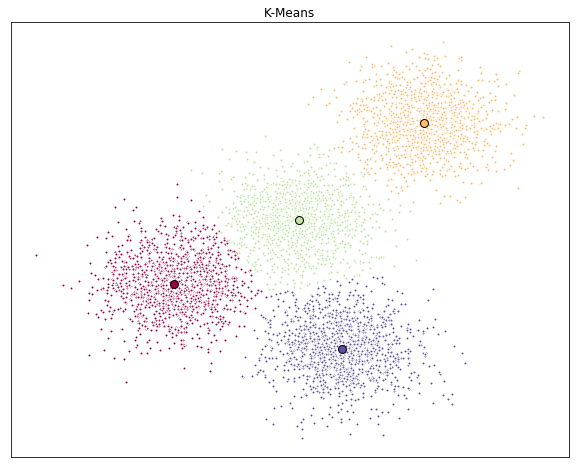

In [104]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 8))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids. k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8)

# Title of the plot
ax.set_title('K-Means')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>


In [105]:
# download data
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-10-13 01:58:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.002s  

2020-10-13 01:58:08 (21.4 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [106]:
# Import library
import pandas as pd
print('imported')

# read the .csv file
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

imported


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2

In [107]:
# k-Mean algorithm isn't applicable to categorical variables (Address). Drop the feature
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


<h2 id="normalizing">Normalizing</h2>
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use ***StandardScaler()*** to normalize our dataset.   

In [108]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>
Without k-Mean algorithm it would be the same as guessing. Using k-Means clustering we can do all this process much easier.
<br/>
<br/>
Apply k-Means for a cluster labels.

In [109]:
clusterNum = 4

k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

k_means.fit(X)
labels = k_means.labels_

print(labels)

[3 1 0 3 2 0 0 0 3 1 0 3 3 3 3 3 3 3 0 3 3 3 0 0 1 0 3 3 0 3 1 0 3 3 3 3 3
 3 3 1 3 1 3 1 3 0 3 3 3 0 0 3 3 0 0 3 3 3 0 3 0 3 0 0 3 3 0 3 3 3 0 0 1 3
 3 3 0 3 1 0 0 0 1 3 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 1 0 0 3 0 3 3 0 0 0
 3 3 3 3 3 3 0 0 3 3 3 3 0 3 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 0 3 0 3
 3 3 3 3 3 3 0 3 1 1 3 0 3 3 0 0 3 3 0 3 3 0 0 3 3 3 3 3 0 3 3 0 0 3 3 1 3
 3 3 3 3 0 3 3 0 3 0 3 3 0 2 3 1 3 3 3 3 0 3 2 1 3 3 0 0 0 3 3 0 0 0 0 3 1
 3 3 3 3 1 3 3 0 3 3 0 3 0 3 3 3 0 3 3 3 3 3 3 1 0 0 0 3 3 3 3 3 0 3 3 3 3
 3 3 0 0 0 0 3 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 1 1 3 1 3 0 3 1 0 3 3 3 3 3 3
 3 3 3 1 0 0 3 3 3 0 0 3 3 3 0 3 3 3 0 3 3 3 3 3 0 3 1 3 3 0 3 3 1 0 0 1 3
 3 0 3 3 0 3 0 3 0 3 3 0 3 3 0 3 3 1 3 3 3 3 3 1 3 3 3 1 3 3 3 0 3 0 1 1 0
 3 3 0 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 3 3 3 0 3 3 3 3 3 1 3 3 3 3 3 3 3 0 3
 0 1 3 3 0 3 3 3 3 0 3 0 3 0 0 3 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 2
 0 3 0 0 0 3 0 3 3 3 1 3 3 3 3 0 3 1 3 3 3 3 0 3 0 0 1 3 0 1 0 3 0 3 3 3 0
 3 0 3 3 3 3 1 3 3 3 0 3 

### Insights

In [110]:
# assign the labels to each row in dataframe
df['Clus_group'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_group
0,1,41,2,6,19,0.124,1.073,0.0,6.3,3
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,3
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [111]:
# the centroid mean values in each cluster
df.groupby('Clus_group').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_group,,,,,,,,,
0,411.273543,39.650224,1.816143,12.798206,61.789238,2.300538,4.355646,0.211957,10.743498
1,399.640625,43.390625,2.156250,19.250000,121.453125,3.830984,7.376562,0.122449,9.262500
2,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,433.723327,31.989150,1.605787,5.394213,27.871609,0.910043,1.880282,0.293478,10.081736


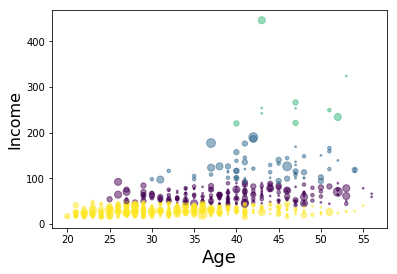

In [112]:
# plot the distribution of customers based on their age & income in 2D
area = np.pi * ( X[:, 1])**2  

plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

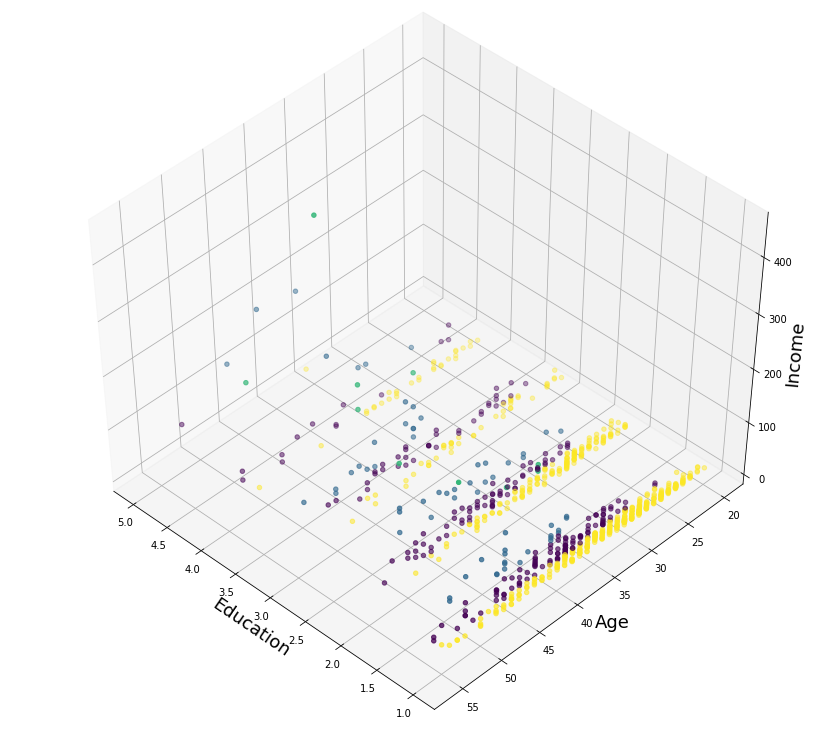

In [113]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(12, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Education', fontsize=18)
ax.set_ylabel('Age',fontsize=18)
ax.set_zlabel('Income',fontsize=18)

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))